In [41]:
# import relevant libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import time # to measure how long the models take
from sklearn import datasets
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, VotingClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [22]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [127]:
data = pd.read_csv('https://raw.githubusercontent.com/lilfakeS/schulich_data_science/main/ds2_a1_train.csv')

In [115]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column                                                                                                                                                Non-Null Count  Dtype 
---  ------                                                                                                                                                --------------  ----- 
 0   age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"  45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [116]:
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y"""
0,"58;""management"";""married"";""tertiary"";""no"";2143..."
1,"44;""technician"";""single"";""secondary"";""no"";29;""..."
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2..."
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506..."
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n..."
...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;..."
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n..."
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""..."
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66..."


In [128]:
data[['age',"job","marital","education","default","balance","housing","loan","contact","day","month","duration","campaign","pdays","previous","poutcome","y"]] = data['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'].str.split(';', expand=True)

In [129]:
data

,"age;""job"";""marital"";""education"";""default"";""balance"";""housing"";""loan"";""contact"";""day"";""month"";""duration"";""campaign"";""pdays"";""previous"";""poutcome"";""y""",age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,"58;""management"";""married"";""tertiary"";""no"";2143...",58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,"44;""technician"";""single"";""secondary"";""no"";29;""...",44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,"33;""entrepreneur"";""married"";""secondary"";""no"";2...",33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,"47;""blue-collar"";""married"";""unknown"";""no"";1506...",47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,"33;""unknown"";""single"";""unknown"";""no"";1;""no"";""n...",33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,"51;""technician"";""married"";""tertiary"";""no"";825;...",51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,"71;""retired"";""divorced"";""primary"";""no"";1729;""n...",71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,"72;""retired"";""married"";""secondary"";""no"";5715;""...",72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,"57;""blue-collar"";""married"";""secondary"";""no"";66...",57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [130]:
data = data.drop(['age;"job";"marital";"education";"default";"balance";"housing";"loan";"contact";"day";"month";"duration";"campaign";"pdays";"previous";"poutcome";"y"'],axis=1)

In [131]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,"""management""","""married""","""tertiary""","""no""",2143,"""yes""","""no""","""unknown""",5,"""may""",261,1,-1,0,"""unknown""","""no"""
1,44,"""technician""","""single""","""secondary""","""no""",29,"""yes""","""no""","""unknown""",5,"""may""",151,1,-1,0,"""unknown""","""no"""
2,33,"""entrepreneur""","""married""","""secondary""","""no""",2,"""yes""","""yes""","""unknown""",5,"""may""",76,1,-1,0,"""unknown""","""no"""
3,47,"""blue-collar""","""married""","""unknown""","""no""",1506,"""yes""","""no""","""unknown""",5,"""may""",92,1,-1,0,"""unknown""","""no"""
4,33,"""unknown""","""single""","""unknown""","""no""",1,"""no""","""no""","""unknown""",5,"""may""",198,1,-1,0,"""unknown""","""no"""
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,"""technician""","""married""","""tertiary""","""no""",825,"""no""","""no""","""cellular""",17,"""nov""",977,3,-1,0,"""unknown""","""yes"""
45207,71,"""retired""","""divorced""","""primary""","""no""",1729,"""no""","""no""","""cellular""",17,"""nov""",456,2,-1,0,"""unknown""","""yes"""
45208,72,"""retired""","""married""","""secondary""","""no""",5715,"""no""","""no""","""cellular""",17,"""nov""",1127,5,184,3,"""success""","""yes"""
45209,57,"""blue-collar""","""married""","""secondary""","""no""",668,"""no""","""no""","""telephone""",17,"""nov""",508,4,-1,0,"""unknown""","""no"""


In [132]:
columns_to_select = ['job', 'marital', 'education', 'default', 'housing',	'loan',	'contact','month', 'poutcome',	'y']

for column in columns_to_select:
    data[column] = data[column].str.strip('"')

In [133]:
data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [134]:
# data = data.drop('contact',axis=1)
data = data.drop('day',axis=1)
data = data.drop('month',axis=1)
data= data.drop('pdays',axis=1)

In [135]:
data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,261,1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,151,1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,76,1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,92,1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,198,1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,977,3,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,456,2,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,1127,5,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,508,4,0,unknown,no


In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  object
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  object
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   duration   45211 non-null  object
 9   campaign   45211 non-null  object
 10  previous   45211 non-null  object
 11  poutcome   45211 non-null  object
 12  y          45211 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


In [136]:
num_col = ['age','balance','duration','campaign','previous']

for col in num_col:
    data[col] = pd.to_numeric(data[col])

<Axes: ylabel='balance'>

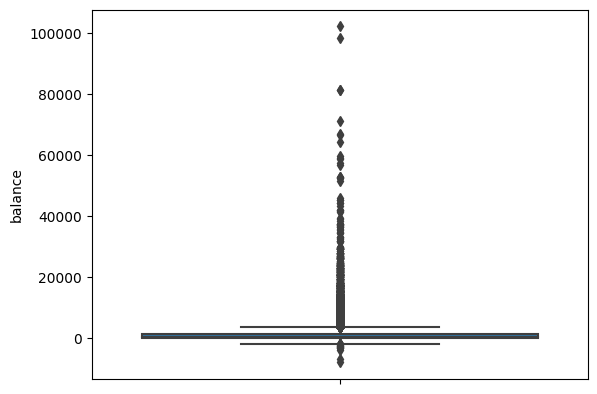

In [62]:
sns.boxplot(data = data, y='balance')

<Axes: xlabel='age', ylabel='Count'>

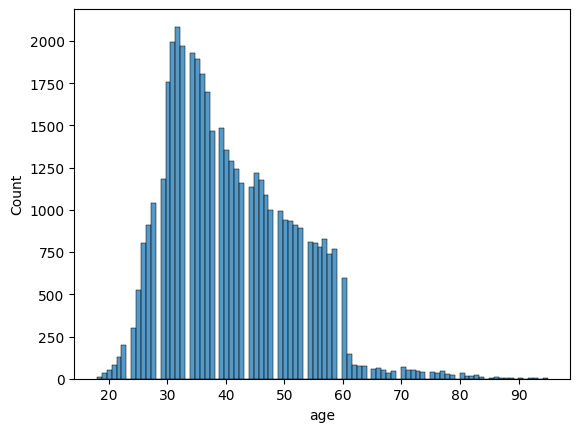

In [63]:
sns.histplot(data['age'])

<Axes: xlabel='job', ylabel='Count'>

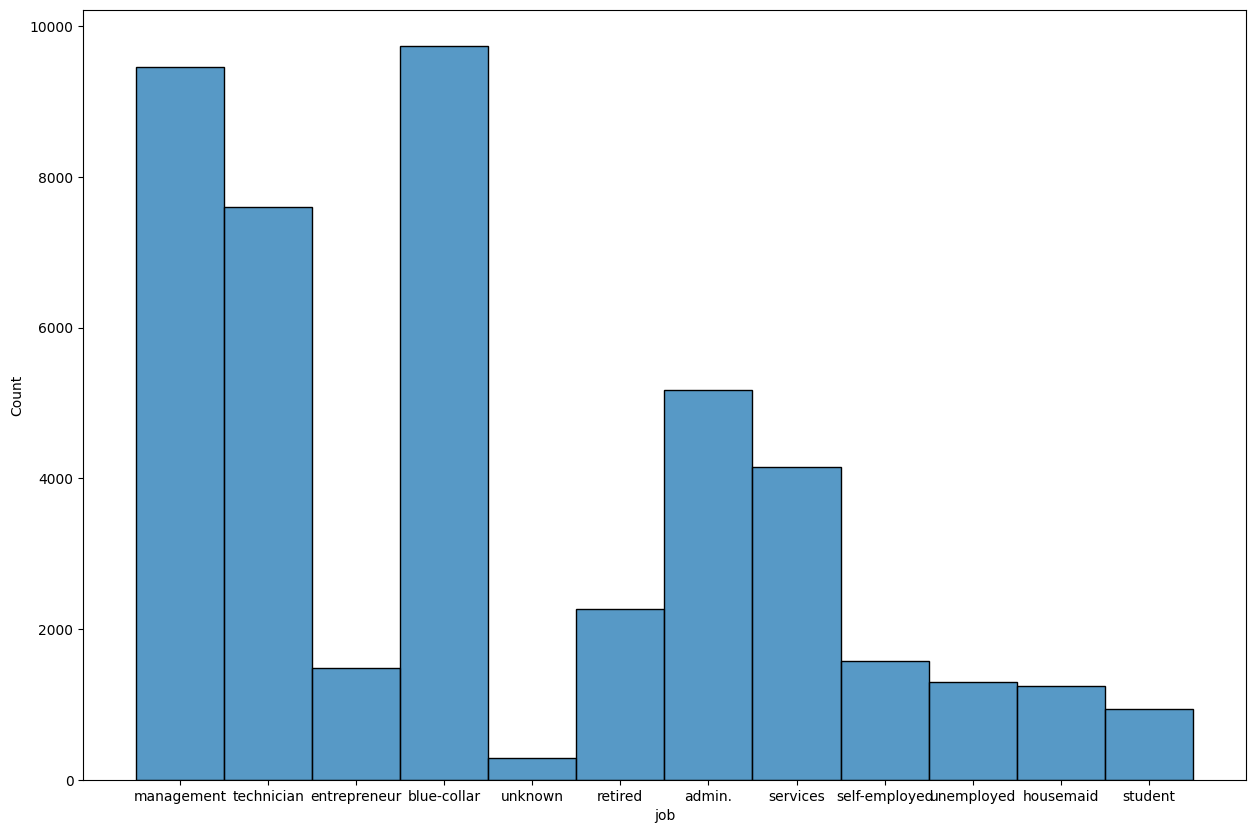

In [67]:
plt.figure(figsize=(15,10))
sns.histplot(data['job'])

<Axes: xlabel='y', ylabel='Count'>

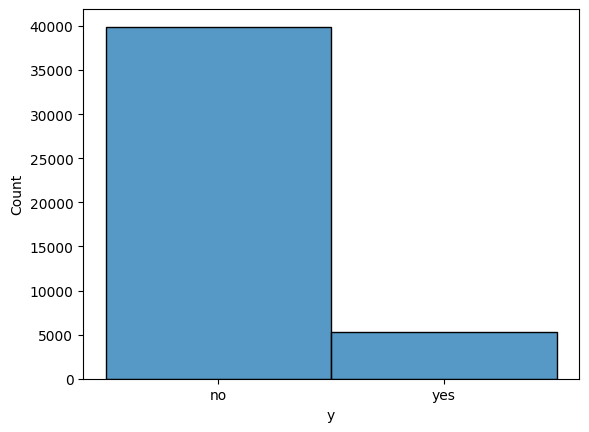

In [68]:
sns.histplot(data['y'])

In [137]:
data['y'] = data['y'].replace({'yes': 1, 'no': 0})
data['default'] = data['default'].replace({'yes': 1, 'no': 0})
data['housing'] = data['housing'].replace({'yes': 1, 'no': 0})
data['loan'] = data['loan'].replace({'yes': 1, 'no': 0})

In [138]:
data

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,previous,poutcome,y
0,58,management,married,tertiary,0,2143,1,0,unknown,261,1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,151,1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,76,1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,92,1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,198,1,0,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,977,3,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,456,2,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,1127,5,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,508,4,0,unknown,0


In [143]:
y = data["y"]
X = data.drop("y", axis=1)

In [144]:
# Identify numerical and categorical columns
#num_cols = X.select_dtypes(include=['float64', 'int64']).columns
#cat_cols = X.select_dtypes(include=['object']).columns
num_cols = ['age','balance','duration','campaign','previous']
cat_cols = ['job', 'marital', 'education', 'contact', 'poutcome','default','housing','loan']

In [145]:
num_cols

['age', 'balance', 'duration', 'campaign', 'previous']

In [146]:
cat_cols

['job',
 'marital',
 'education',
 'contact',
 'poutcome',
 'default',
 'housing',
 'loan']

In [147]:
# Create a column transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

In [149]:
y_test

1657     0
18914    0
31794    0
2138     0
29529    0
        ..
41766    0
17298    0
36787    0
13249    0
20265    0
Name: y, Length: 9043, dtype: int64

In [150]:
y_train

43550    0
42654    0
29455    0
21126    0
42918    1
        ..
40211    0
36950    0
4820     0
10196    0
12116    0
Name: y, Length: 36168, dtype: int64

In [151]:
# Set up models to compare - I am adding some initial parameters

knn = KNeighborsClassifier(n_neighbors=10)
log_reg = LogisticRegression()
dt = DecisionTreeClassifier(max_depth=20)
rf = RandomForestClassifier()
ada = AdaBoostClassifier()
bag = BaggingClassifier()
voting = VotingClassifier(estimators=[('lr', log_reg), ('knn', knn), ('dt', dt)])

In [152]:
classifiers = {
    'K-Nearest Neighbors': knn,
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'AdaBoost': ada,
    'Bagging': bag,
    'Voting': voting
}

In [153]:
# Create dictionary to store the results of each model
results = {}

In [154]:
# Loop through list of models to compare performance
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Fit the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_pred = pipeline.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    results[name] = {
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
results_df = pd.DataFrame(results).T
print(results_df)

                     Precision    Recall  F1-Score  Accuracy  Time (s)
K-Nearest Neighbors   0.642241  0.279026  0.389034  0.896495  0.369627
Logistic Regression   0.684112  0.342697  0.456644  0.903682  0.525803
Decision Tree         0.390476  0.383895  0.387158  0.856464  0.252432
Random Forest         0.637847  0.366105  0.465199  0.900586  2.174313
AdaBoost              0.626750  0.377341  0.471070  0.899923  0.796789
Bagging               0.568282  0.362360  0.442539  0.892182  0.941954
Voting                0.664751  0.324906  0.436478  0.900918  1.091389


In [155]:
import warnings

warnings.filterwarnings('ignore', category=UserWarning)

In [156]:
# Import additional libraries
from sklearn.model_selection import GridSearchCV

# Hyperparameter grids for tuning
knn_params = {'classifier__n_neighbors': [3, 5, 7, 20, 30, 50, 100]}
log_reg_params = {'classifier__C': [0.1, 1, 10]}
dt_params = {'classifier__max_depth': [10,20,30,40,50]}
rf_params = {'classifier__n_estimators': [50, 100, 150], 'classifier__max_depth': [None, 10, 20, 30, 50]}
ada_params = {'classifier__n_estimators': [25, 50, 75]}
bag_params = {'classifier__n_estimators': [5, 10, 20]}
voting_params = {'classifier__voting': ['hard', 'soft']}

params_dict = {
    'K-Nearest Neighbors': knn_params,
    'Logistic Regression': log_reg_params,
    'Decision Tree': dt_params,
    'Random Forest': rf_params,
    'AdaBoost': ada_params,
    'Bagging': bag_params,
    'Voting': voting_params
}

# Initialize results dictionary for tuned models
tuned_results = {}

# Loop through classifiers for tuning
for name, clf in classifiers.items():
    start_time = time.time()
    
    # Create pipeline
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('classifier', clf)])
    
    # Create GridSearchCV object
    grid = GridSearchCV(pipeline, params_dict[name], cv=5)
    
    # Fit the model
    grid.fit(X_train, y_train)
    
    # Get the best estimator and predict
    best_model = grid.best_estimator_
    y_pred = best_model.predict(X_test)
    
    # Compute metrics
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    end_time = time.time()
    elapsed_time = end_time - start_time
    
    # Store results
    tuned_results[name] = {
        'Best Params': grid.best_params_,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'Accuracy': accuracy,
        'Time (s)': elapsed_time
    }

# Convert results to DataFrame for easier viewing
tuned_results_df = pd.DataFrame(tuned_results).T
print(tuned_results_df);

                                                           Best Params   
K-Nearest Neighbors                    {'classifier__n_neighbors': 20}  \
Logistic Regression                              {'classifier__C': 10}   
Decision Tree                            {'classifier__max_depth': 10}   
Random Forest        {'classifier__max_depth': 20, 'classifier__n_e...   
AdaBoost                              {'classifier__n_estimators': 75}   
Bagging                               {'classifier__n_estimators': 20}   
Voting                                  {'classifier__voting': 'hard'}   

                    Precision    Recall  F1-Score  Accuracy    Time (s)  
K-Nearest Neighbors  0.647597  0.264981   0.37608  0.900918   10.976424  
Logistic Regression  0.682836  0.342697  0.456359  0.900918    3.724282  
Decision Tree        0.594635  0.373596  0.458884  0.900918    3.886308  
Random Forest        0.636213  0.358614  0.458683  0.900918  118.470402  
AdaBoost               0.6368  0.3726